<a href="https://colab.research.google.com/github/ptmhoang97/keras/blob/main/understand_convolutional_layer_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
from numpy import expand_dims
import numpy as np

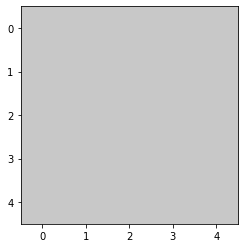

In [58]:
# Input image
gray_img = np.full((5, 5), 200)
plt.imshow(gray_img, cmap='gray', vmin=0, vmax=255)

In [116]:
# Create model with 1 convolutional layer
model = models.Sequential()
model.add(layers.Conv2D(1, (3, 3), padding = 'valid', activation='relu', input_shape=(5, 5, 1)))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 3, 3, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


###### Because **padding = 'valid'**, each dimension will be (5-3)+1 = 3.

# Calculate convolutional layer manually

In [117]:
# Check random weight of kernel
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

print(filters)
print(biases)

conv2d_12 (3, 3, 1, 1)
[[[[ 0.5263597 ]]

  [[-0.20879844]]

  [[-0.06395227]]]


 [[[-0.52056354]]

  [[ 0.5071887 ]]

  [[-0.04042137]]]


 [[[ 0.36661893]]

  [[ 0.12462151]]

  [[-0.343391  ]]]]
[0.]


In [118]:
# Minimize the array for friendly view and better understanding
weight = tf.squeeze(filters)
print(weight)

tf.Tensor(
[[ 0.5263597  -0.20879844 -0.06395227]
 [-0.52056354  0.5071887  -0.04042137]
 [ 0.36661893  0.12462151 -0.343391  ]], shape=(3, 3), dtype=float32)


In [119]:
# Use gray_img[1:-1,1:-1] to get imgage without the border value, shape of image will be (3,3).
convolution_calculate = gray_img[1:-1,1:-1] * ( weight[0][0] + weight[0][1] + weight[0][2] + 
                                                weight[1][0] + weight[1][1] + weight[1][2] +
                                                weight[2][0] + weight[2][1] + weight[2][2] )
print(convolution_calculate)

tf.Tensor(
[[69.53243 69.53243 69.53243]
 [69.53243 69.53243 69.53243]
 [69.53243 69.53243 69.53243]], shape=(3, 3), dtype=float32)


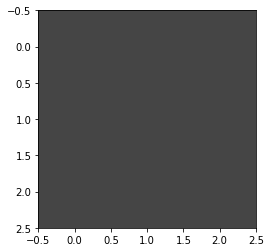

In [120]:
plt.imshow(convolution_calculate, cmap='gray', vmin=0, vmax=255)

# Use model.predict() to calculate convolutional layer

tf.Tensor(
[[69.53243 69.53243 69.53243]
 [69.53243 69.53243 69.53243]
 [69.53243 69.53243 69.53243]], shape=(3, 3), dtype=float32)


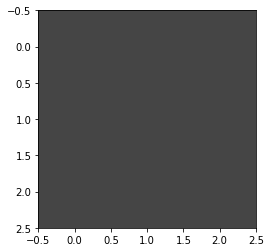

In [121]:
# convert the image to an array
img = img_to_array(gray_img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# Exucute convolutional layer
feature_maps = model.predict(img)
print(tf.squeeze(feature_maps))
plt.imshow(tf.squeeze(feature_maps), cmap='gray' ,vmin=0, vmax=255)
# show the figure
plt.show()